In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)
import matplotlib.gridspec as gridspec
import torch
import torch.nn as nn
from PIL import Image
from scipy.signal import convolve2d
from skimage.measure import block_reduce, find_contours
from matplotlib.patches import Rectangle
from kural_core.models import *
from kural_core.data_processing import *
from kural_core.functions import *
from kural_core.train_model import train_model
import pickle
from scipy.misc import imresize
from scipy.ndimage import morphology
from scipy.spatial import ConvexHull
from skimage import measure
from matplotlib import animation, rc
from IPython.display import HTML
from os import listdir
from nd2reader import ND2Reader

PATH = r'D:\Code\kural_work\actin_gan_data\\'

In [4]:
img_file = ND2Reader(PATH+'NDSequence001.nd2')

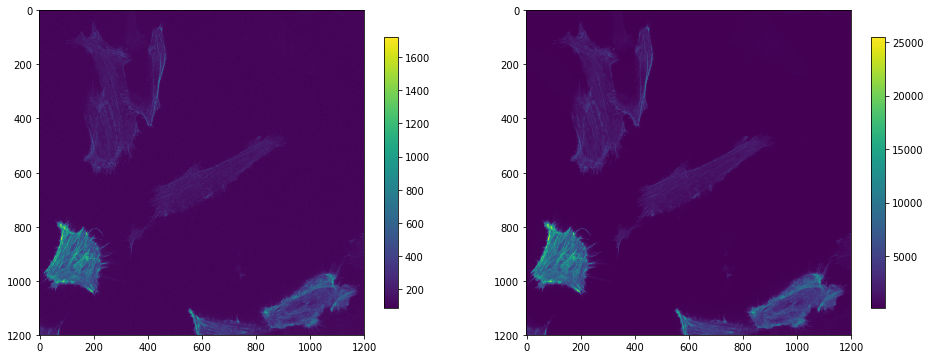

In [54]:
fig, ax = plt.subplots(1,2,figsize=(16,10))
for i in range(2):
    mappable = ax[i].imshow(f.get_frame_2D(c=i,v=0))
    plt.colorbar(mappable=mappable, ax=ax[i], shrink=0.5)

In [5]:
nf = len(img_file.metadata['fields_of_view'])

In [6]:
he = np.zeros((nf,img_file.metadata['height'],img_file.metadata['width']),dtype=np.int16)
le = np.zeros((nf,img_file.metadata['height'],img_file.metadata['width']),dtype=np.int16)
for f in range(nf):
    he[f] = img_file.get_frame_2D(c=0,v=f)
    le[f] = img_file.get_frame_2D(c=1,v=f)

In [7]:
he.size

1440000000